In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv(r'C:\Users\sumay\Downloads\Customer Churn Prediction\data\Bank Customer Churn Prediction.csv')

In [4]:
data

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
data.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
data=data.drop(['customer_id'],axis=1)

In [10]:
data.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [11]:
fig=make_subplots(rows=2,cols=1)
tr1=go.Box(x=data['age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=data['age'],name='Age Histrogram')
fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height=700,width=1200,title_text="Distribution of Customer Ages")
fig.show()

In [12]:
fig=make_subplots(rows=2,cols=1)
tr1=go.Box(x=data['estimated_salary'],name='Salary Box Plot',boxmean=True)
tr2=go.Histogram(x=data['estimated_salary'],name='Salary Histrogram')
fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height=700,width=1200,title_text="Distribution of Estimated Salary")
fig.show()

In [13]:
fig=make_subplots(rows=2,cols=1)
tr1=go.Box(x=data['credit_score'],name='Credit Score Box Plot',boxmean=True)
tr2=go.Histogram(x=data['credit_score'],name='Credit Score Histrogram')
fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height=700,width=1200,title_text="Distribution of Credit Score")
fig.show()

In [14]:
fig=make_subplots(rows=2,cols=1)
tr1=go.Box(x=data['balance'],name='Balance Box Plot',boxmean=True)
tr2=go.Histogram(x=data['balance'],name='Balance Histrogram')
fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height=700,width=1200,title_text="Distribution of Balance")
fig.show()

In [15]:
fig=make_subplots(rows=2,cols=1)
tr1=go.Box(x=data['tenure'],name='Tenure Box Plot',boxmean=True)
tr2=go.Histogram(x=data['tenure'],name='Tenure Histrogram')
fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height=700,width=1200,title_text="Distribution of Tenure")
fig.show()

In [16]:
ex.pie(data,names='gender',title='Gender Distribution',hole=0.33)

C:\Users\sumay\AppData\Local\Temp\ipykernel_15364\514009902.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

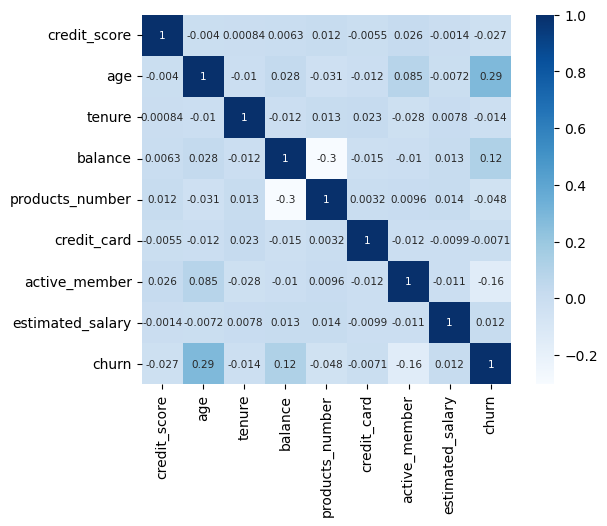

In [17]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)

C:\Users\sumay\AppData\Local\Temp\ipykernel_15364\705903815.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

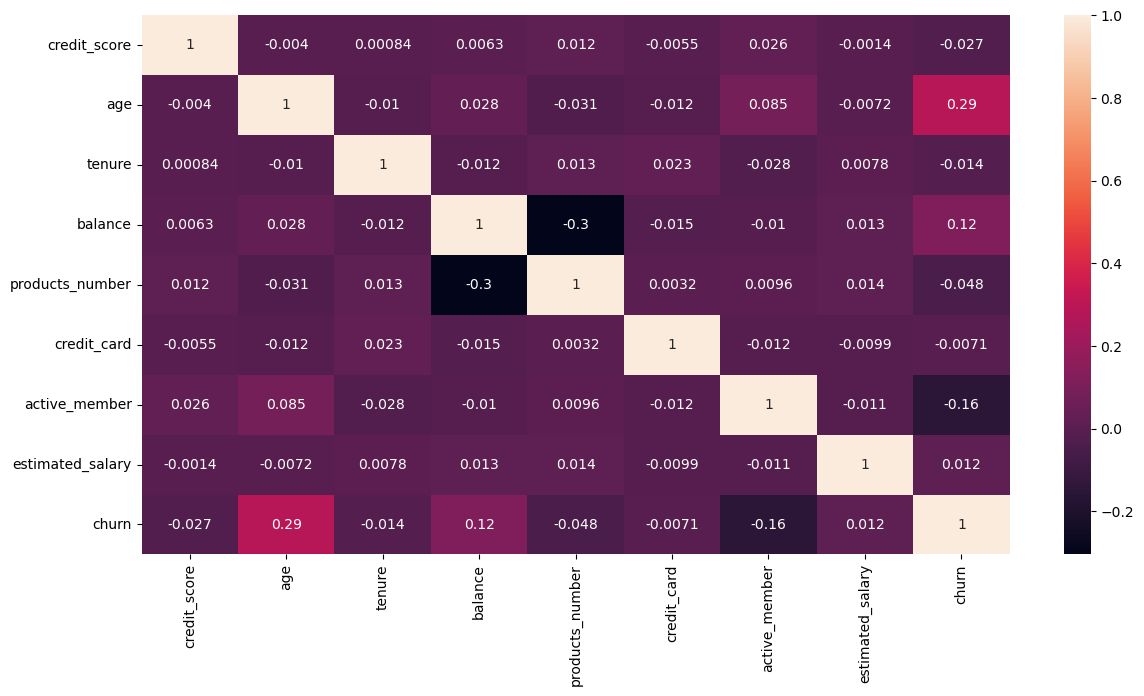

In [18]:
corr = data.corr()
plt.figure(figsize = (14,7))
sns.heatmap(corr, annot = True)

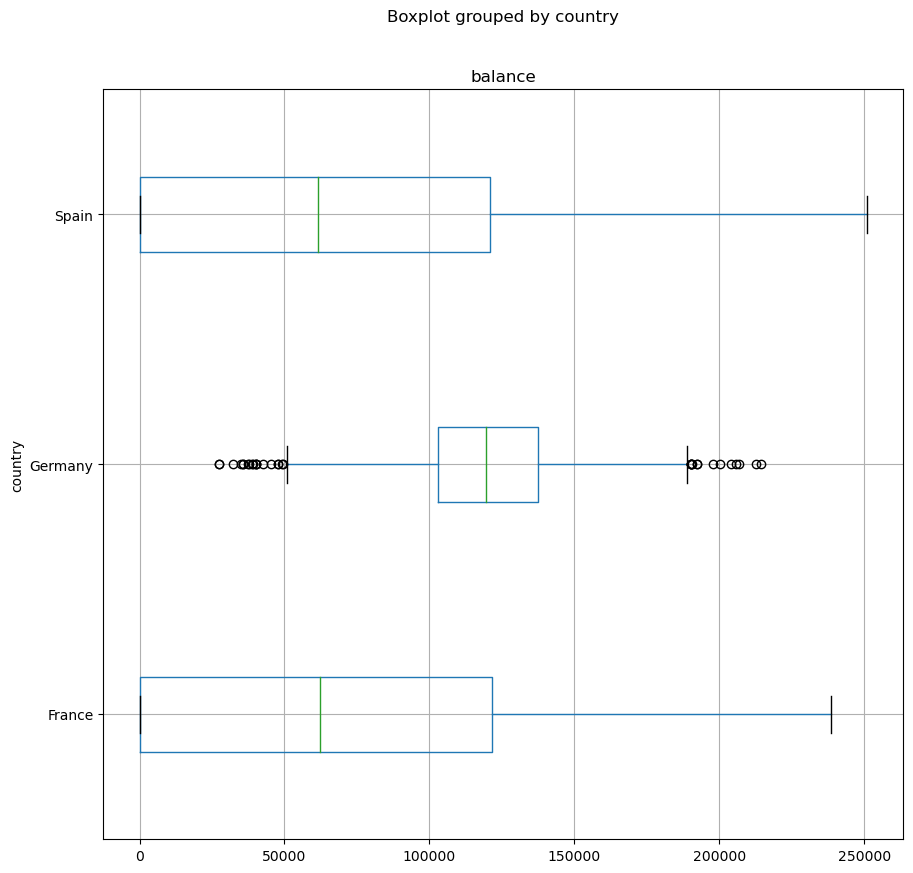

In [19]:
data.boxplot(column = "balance",by = "country",figsize = (10,10) , vert = False)
plt.show()

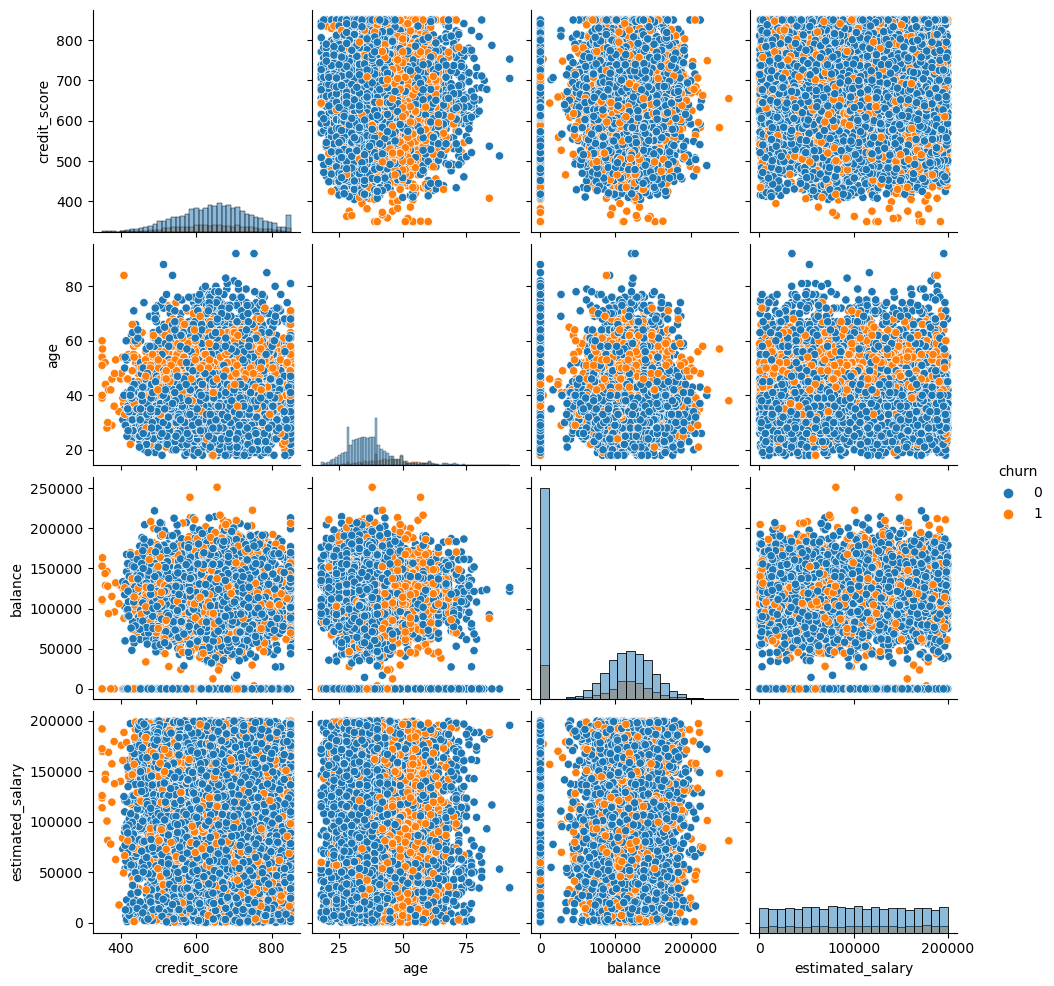

In [20]:
sns.pairplot(data.drop(["active_member","credit_card","products_number","tenure"],axis =1), hue = "churn",diag_kind = "hist")

In [21]:
ex.pie(data,names='country',title='Country',hole=0.33)

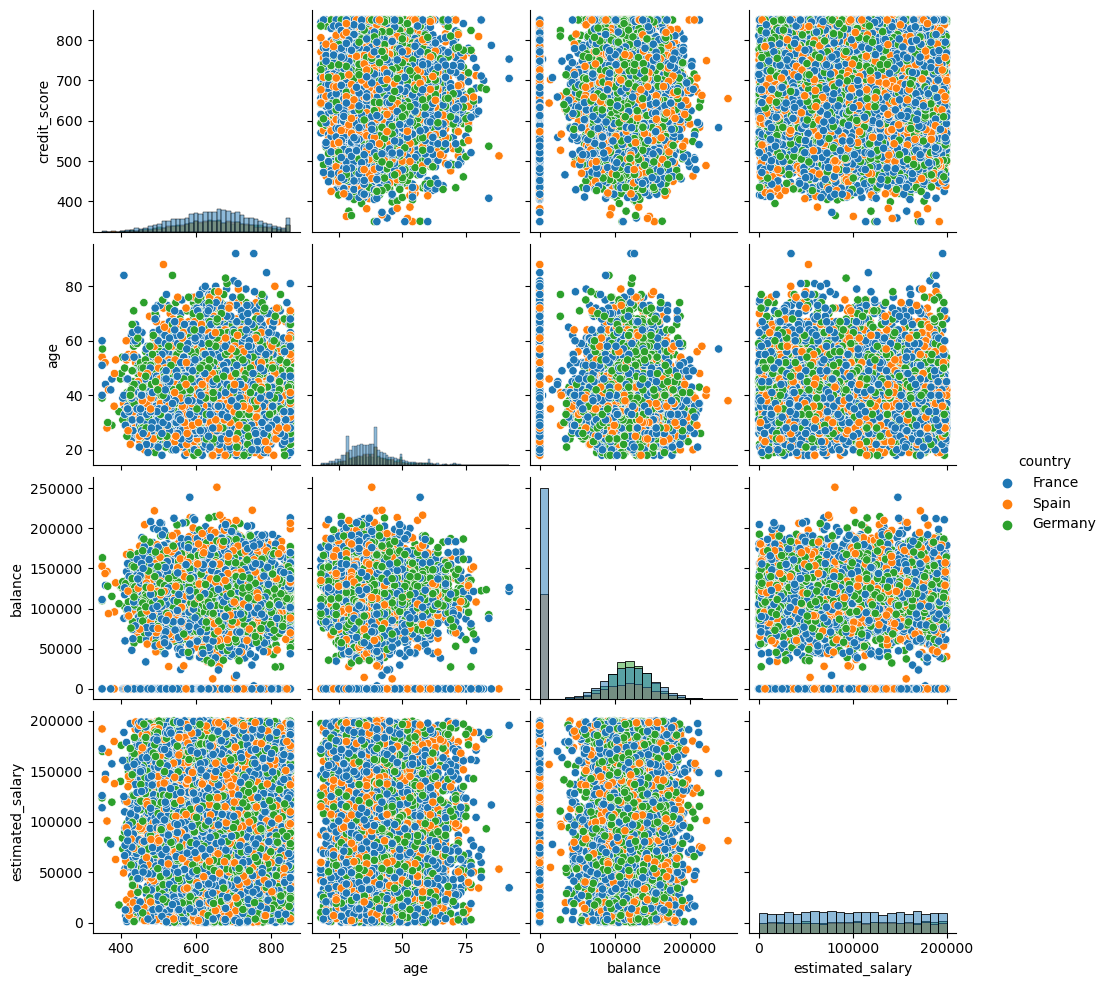

In [22]:
sns.pairplot(data.drop(["active_member","credit_card","products_number","tenure","churn"],axis =1), hue = "country",diag_kind = "hist")

In [23]:
numerical = data[[
            "credit_score",
            "age",
            "tenure",
            "balance",
            "products_number",
            "estimated_salary"]]

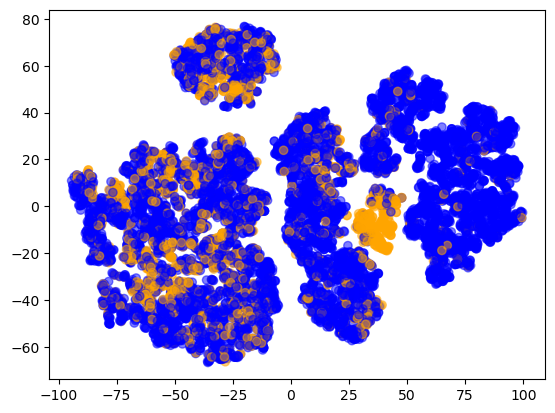

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numerical)
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(x_scaled)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=data["churn"].map({0: "blue", 1: "orange"}),
alpha=0.5);

In [25]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [27]:
country=enc.fit_transform(data['country'])

In [28]:
gender=enc.fit_transform(data['gender'])

In [29]:
country

array([0, 2, 0, ..., 0, 1, 0])

In [30]:
gender

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
data['gender']=gender
data['country']=country

In [32]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

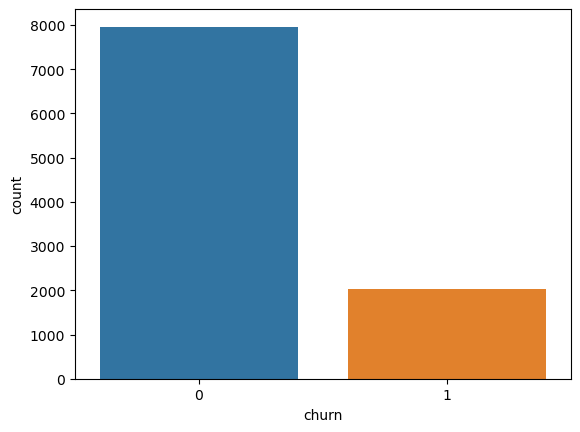

In [33]:
sns.countplot(x=data['churn'])

In [34]:
x=data.drop('churn',axis=1)
y=data['churn']

In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [36]:
x.head()

credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  
0            1              1         101348.88  
1            0              1         112542.58  
2            1              0         113931.57  
3            0              0          93826.63  
4            1              1          79084.10

In [37]:
from imblearn.over_sampling import SMOTE
x_res,y_res= SMOTE().fit_resample(x,y)


In [38]:
y_res.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [41]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [42]:
x_train_std

array([[ 0.65136005, -0.89362356,  1.18922265, ..., -1.28399714,
        -0.76444755, -0.1714161 ],
       [ 1.10014251, -0.89362356,  1.18922265, ..., -1.28399714,
         1.30813423,  0.74932512],
       [-0.65120368, -0.89362356,  1.18922265, ..., -1.28399714,
         1.30813423,  1.43165078],
       ...,
       [ 0.20257759, -0.89362356,  1.18922265, ...,  0.77881794,
        -0.76444755, -0.05626534],
       [ 1.27527713,  1.74754664, -0.84088543, ..., -1.28399714,
        -0.76444755,  1.05878853],
       [ 0.530955  ,  0.42696154,  1.18922265, ...,  0.77881794,
         1.30813423, -0.82504071]])

In [43]:
#DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [45]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [46]:
y_pred=dt.predict(x_test_std)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
ac_dc=accuracy_score(y_test,y_pred)

In [49]:
ac_dc

0.7966101694915254

In [50]:
from sklearn.metrics import precision_score

In [51]:
pc_dc=precision_score(y_test,y_pred)

In [52]:
pc_dc

0.7777777777777778

In [96]:
from sklearn.metrics import recall_score,f1_score

In [97]:
rc_dc=recall_score(y_test,y_pred)

In [98]:
rc_dc

0.8158403090792016

In [99]:
f1_dc=f1_score(y_test,y_pred)

In [100]:
f1_dc

0.7963544940289126

In [53]:
#LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [55]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [56]:
y_pred1=lr.predict(x_test_std)

In [57]:
ac_lr=accuracy_score(y_test,y_pred1)

In [58]:
ac_lr

0.7667922159447583

In [59]:
pc_lr=precision_score(y_test,y_pred1)

In [60]:
pc_lr

0.753125

In [105]:
rc_lr=recall_score(y_test,y_pred1)

In [106]:
rc_lr

0.7759175788795879

In [107]:
f1_lr=f1_score(y_test,y_pred1)

In [108]:
f1_lr

0.7643514113542659

In [61]:
#KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [63]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [64]:
y_pred2=knn.predict(x_test_std)

In [65]:
ac_knn=accuracy_score(y_test,y_pred2)

In [66]:
ac_knn

0.8301946013810421

In [67]:
pc_knn=precision_score(y_test,y_pred2)

In [68]:
pc_knn

0.8070388349514563

In [109]:
rc_knn=recall_score(y_test,y_pred2)

In [110]:
rc_knn

0.8564069542820347

In [111]:
f1_knn=f1_score(y_test,y_pred2)

In [112]:
f1_knn

0.8309903155263979

In [69]:
#Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [71]:
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [72]:
y_pred3=rf.predict(x_test_std)

In [73]:
ac_rf=accuracy_score(y_test,y_pred3)

In [74]:
ac_rf

0.8600125549278091

In [75]:
pc_rf=precision_score(y_test,y_pred3)

In [76]:
pc_rf

0.8470219435736677

In [113]:
rc_rf=recall_score(y_test,y_pred3)

In [114]:
rc_rf

0.8699291693496458

In [115]:
f1_rf=f1_score(y_test,y_pred3)

In [116]:
f1_rf

0.8583227445997459

In [77]:
#SVM

In [78]:
from sklearn.svm import SVC
sv=SVC()

In [79]:
sv.fit(x_train_std,y_train)

SVC()

In [80]:
y_pred4=sv.predict(x_test_std)

In [81]:
ac_sv=accuracy_score(y_test,y_pred4)

In [82]:
ac_sv

0.8455743879472694

In [83]:
pc_sv=precision_score(y_test,y_pred4)

In [84]:
pc_sv

0.8347003154574133

In [117]:
rc_sv=recall_score(y_test,y_pred4)

In [118]:
rc_sv

0.8518995492594977

In [119]:
f1_sv=f1_score(y_test,y_pred4)

In [120]:
f1_sv

0.8432122370936902

In [85]:
#Gradient Boosting 

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [87]:
gb.fit(x_train_std,y_train)

GradientBoostingClassifier()

In [88]:
y_pred5=gb.predict(x_test_std)

In [89]:
ac_gb=accuracy_score(y_test,y_pred5)

In [90]:
ac_gb

0.8430634023854363

In [91]:
pc_gb=precision_score(y_test,y_pred5)

In [92]:
pc_gb

0.836852207293666

In [121]:
rc_gb=recall_score(y_test,y_pred5)

In [122]:
rc_gb

0.8422408242112042

In [123]:
f1_gb=f1_score(y_test,y_pred5)

In [124]:
f1_gb

0.8395378690629013

In [125]:
final_data_ac=pd.DataFrame({'Models':['DT','LR','KNN','RF','SVC','GB'],
                        'Accuracy':[accuracy_score(y_test,y_pred),
                        accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),
                        accuracy_score(y_test,y_pred3),
                        accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5)]})

In [126]:
final_data_ac

Models  Accuracy
0     DT  0.796610
1     LR  0.766792
2    KNN  0.830195
3     RF  0.860013
4    SVC  0.845574
5     GB  0.843063

In [127]:
final_data_pc=pd.DataFrame({'Models':['DT','LR','KNN','RF','SVC','GB'],
                        'Precision':[precision_score(y_test,y_pred),
                        precision_score(y_test,y_pred1),
                        precision_score(y_test,y_pred2),
                        precision_score(y_test,y_pred3),
                        precision_score(y_test,y_pred4),
                        precision_score(y_test,y_pred5)]})

In [128]:
final_data_pc

Models  Precision
0     DT   0.777778
1     LR   0.753125
2    KNN   0.807039
3     RF   0.847022
4    SVC   0.834700
5     GB   0.836852

In [129]:
final_data_rc=pd.DataFrame({'Models':['DT','LR','KNN','RF','SVC','GB'],
                        'Recall':[recall_score(y_test,y_pred),
                        recall_score(y_test,y_pred1),
                        recall_score(y_test,y_pred2),
                        recall_score(y_test,y_pred3),
                        recall_score(y_test,y_pred4),
                        recall_score(y_test,y_pred5)]})

In [130]:
final_data_rc

Models    Recall
0     DT  0.815840
1     LR  0.775918
2    KNN  0.856407
3     RF  0.869929
4    SVC  0.851900
5     GB  0.842241

In [131]:
final_data_f1=pd.DataFrame({'Models':['DT','LR','KNN','RF','SVC','GB'],
                        'F1':[f1_score(y_test,y_pred),
                        f1_score(y_test,y_pred1),
                        f1_score(y_test,y_pred2),
                        f1_score(y_test,y_pred3),
                        f1_score(y_test,y_pred4),
                        f1_score(y_test,y_pred5)]})

In [132]:
final_data_f1

Models        F1
0     DT  0.796354
1     LR  0.764351
2    KNN  0.830990
3     RF  0.858323
4    SVC  0.843212
5     GB  0.839538

<Axes: xlabel='Models', ylabel='Accuracy'>

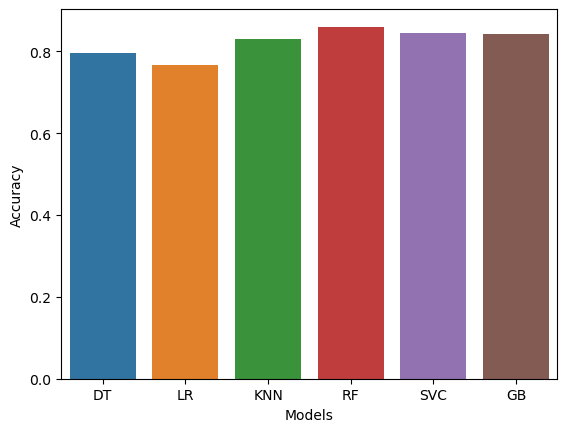

In [133]:
sns.barplot(x=final_data_ac['Models'],y=final_data['Accuracy'])

<Axes: xlabel='Models', ylabel='Precision'>

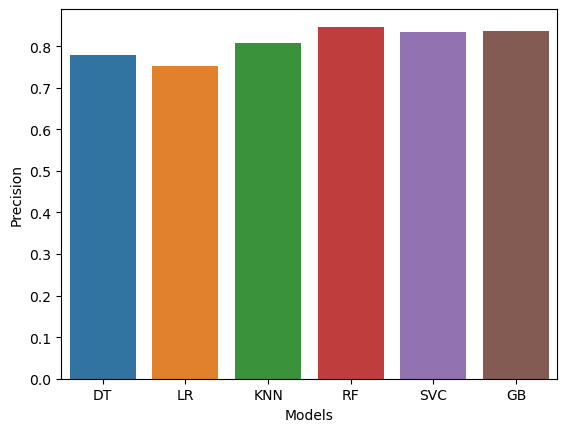

In [134]:
sns.barplot(x=final_data_pc['Models'],y=final_data_pc['Precision'])

<Axes: xlabel='Models', ylabel='Recall'>

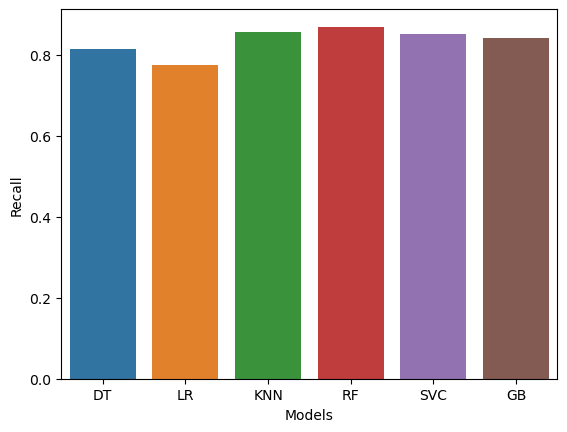

In [135]:
sns.barplot(x=final_data_rc['Models'],y=final_data_rc['Recall'])

<Axes: xlabel='Models', ylabel='F1'>

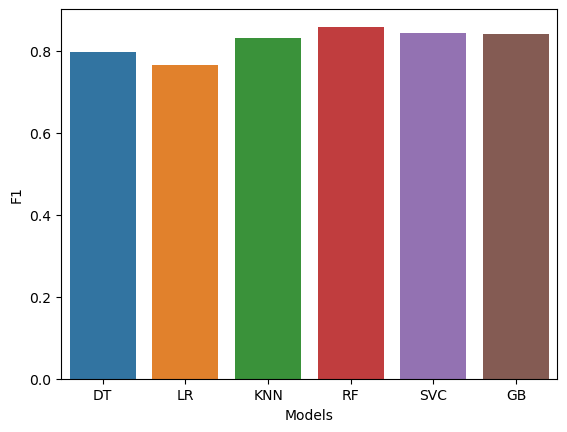

In [136]:
sns.barplot(x=final_data_f1['Models'],y=final_data_f1['F1'])